In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_csv("BacheloretteDSFinal-Dogu.csv")

In [239]:
df.head()

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25.0,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown
1,15.0,Tyler Cameron,26.0,"Jupiter, Florida",FL,Wake Forest,General Contractor,0.0,187.96,No,Brown,Green
2,15.0,Peter Weber,27.0,"Westlake Village, California",CA,Baylor University,Pilot,0.0,175.25,No,Brown,Brown
3,15.0,Luke Parker,24.0,"Gainesville, Georgia",GA,Faulkner University,Import/Export Manager,0.0,175.00,No,Blonde,Brown
4,15.0,Garrett Powell,27.0,"Homewood, Alabama",AL,Mississippi State University,Golf Pro,0.0,NaN,No,Brown,Green


In [240]:
df.describe()

,Season,Age,Win_Loss,Height (cm)
count,141.000000,141.000000,141.000000,101.000000
mean,13.070922,28.539007,0.035461,184.799802
std,1.407355,2.705861,0.185601,5.692313
min,11.000000,23.000000,0.000000,170.000000
25%,12.000000,27.000000,0.000000,180.330000
50%,13.000000,28.000000,0.000000,185.420000
75%,14.000000,30.000000,0.000000,188.000000
max,15.000000,37.000000,1.000000,198.120000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Season                         141 non-null    float64
 1   Name                           141 non-null    object 
 2   Age                            141 non-null    float64
 3   Hometown                       141 non-null    object 
 4   State                          141 non-null    object 
 5   College                        140 non-null    object 
 6   Occupation                     141 non-null    object 
 7   Win_Loss                       141 non-null    float64
 8   Height (cm)                    101 non-null    float64
 9   Girlfriend While on the Show?  141 non-null    object 
 10  Hair Color                     141 non-null    object 
 11  Eye Color                      141 non-null    object 
dtypes: float64(4), object(8)
memory usage: 14.6+ KB


In [242]:
df.isnull().sum()

Season                           13
Name                             13
Age                              13
Hometown                         13
State                            13
College                          14
Occupation                       13
Win_Loss                         13
Height (cm)                      53
Girlfriend While on the Show?    13
Hair Color                       13
Eye Color                        13
dtype: int64

In [243]:
df.drop_duplicates(inplace=True)

In [244]:
df.isnull().sum()

Season                            1
Name                              1
Age                               1
Hometown                          1
State                             1
College                           2
Occupation                        1
Win_Loss                          1
Height (cm)                      41
Girlfriend While on the Show?     1
Hair Color                        1
Eye Color                         1
dtype: int64

In [245]:
df[df["Season"].isnull()]

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df.dropna(how='all',inplace=True)

In [247]:
df.shape

(141, 12)

In [248]:
df.isnull().sum()

Season                            0
Name                              0
Age                               0
Hometown                          0
State                             0
College                           1
Occupation                        0
Win_Loss                          0
Height (cm)                      40
Girlfriend While on the Show?     0
Hair Color                        0
Eye Color                         0
dtype: int64

In [249]:
df[df["College"].isnull()]

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
5,15.0,Mike Johnson,31.0,"San Antonio, Texas",TX,NaN,Portfolio Manager,0.0,180.0,No,Brown,Brown


In [250]:
#since the person whose college is missing belong to TX state we're looking for colleges of other participants from TX
df[df.values=='TX']

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
5,15.0,Mike Johnson,31.0,"San Antonio, Texas",TX,NaN,Portfolio Manager,0.0,180.00,No,Brown,Brown
15,15.0,Cameron Ayala,30.0,"Austin, Texas",TX,Texas A&M University,Software Sales,0.0,177.80,No,Brown,Blue
62,13.0,Adam Gottschalk,27.0,"Dallas, Texas",TX,University of Texas at Austin,Real Estate Agent,0.0,188.00,No,Brown,Brown
72,13.0,Jack Stone,32.0,"Dallas, Texas",TX,Other,Attorney,0.0,180.33,No,Brown,Brown
76,13.0,"Frederick ""Fred"" Johnson",27.0,"Dallas, Texas",TX,Florida State University,Executive Assistant,0.0,182.88,No,Brown,Brown
92,12.0,Luke Pell,31.0,"Burnet, Texas",TX,West Point,War Veteran,0.0,185.42,No,Brown,Brown


In [251]:
df["College"].fillna(value="University of Texas at Austin",inplace=True)#filling missing value with other value

In [252]:
df.isnull().sum()

Season                            0
Name                              0
Age                               0
Hometown                          0
State                             0
College                           0
Occupation                        0
Win_Loss                          0
Height (cm)                      40
Girlfriend While on the Show?     0
Hair Color                        0
Eye Color                         0
dtype: int64

In [253]:
df[df["Height (cm)"].isnull()]#checking the missing values in height column

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
4,15.0,Garrett Powell,27.0,"Homewood, Alabama",AL,Mississippi State University,Golf Pro,0.0,NaN,No,Brown,Green
9,15.0,Devin Harris,27.0,"Sherman Oaks, California",CA,University of San Diego,Talent Manager,0.0,NaN,No,Brown,Brown
10,15.0,Grant Eckel,30.0,"San Clemente, California",CA,Saddleback College,Unemployed,0.0,NaN,No,Brown,Brown
11,15.0,Kevin Fortenberry,27.0,"Manteno, Illinois",IL,Other,Behavioral Health Specialist,0.0,NaN,No,Brown,Blue
13,15.0,Matteo Valles,25.0,"Atlanda, Georgia",GA,Georgia tech,Management Consultant,0.0,NaN,No,Brown,Brown
16,15.0,Joey Jones,33.0,"Bethesda, Maryland",MD,Boston College,Finance Manager,0.0,NaN,No,Brown,Brown
17,15.0,Jonathan Saunders,27.0,"Los Angeles, California",CA,Other,Server,0.0,NaN,No,Brown,Brown
18,15.0,Tyler Gwozdz,28.0,"Boca Raton, Florida",FL,Wake Forest,Psychology Graduate Student,0.0,NaN,No,Brown,Blue
19,15.0,Connor Jenkins,28.0,"Newport Beach, California",CA,University of Missouri-Columbia,Sales Manager,0.0,NaN,No,Brown,Brown
20,15.0,Daron Blaylock,25.0,"Buckhead, Georgia",GA,University of Kentucky,IT Consultant,0.0,NaN,No,Brown,Brown


In [254]:
df["Height (cm)"].value_counts()

187.96    21
190.50    15
182.88    12
180.33    12
185.42     6
180.30     5
182.80     4
188.00     3
193.04     3
172.72     2
175.26     2
177.80     2
185.00     2
193.00     2
175.25     2
175.00     2
198.12     1
170.18     1
170.00     1
198.00     1
180.00     1
188.90     1
Name: Height (cm), dtype: int64

In [255]:
df["Height (cm)"].fillna(value=180.80,inplace=True)

In [256]:
df["Height (cm)"].value_counts()

180.80    40
187.96    21
190.50    15
180.33    12
182.88    12
185.42     6
180.30     5
182.80     4
193.04     3
188.00     3
177.80     2
172.72     2
175.00     2
175.26     2
175.25     2
185.00     2
193.00     2
198.00     1
180.00     1
170.18     1
170.00     1
198.12     1
188.90     1
Name: Height (cm), dtype: int64

In [257]:
df.isnull().sum()

Season                           0
Name                             0
Age                              0
Hometown                         0
State                            0
College                          0
Occupation                       0
Win_Loss                         0
Height (cm)                      0
Girlfriend While on the Show?    0
Hair Color                       0
Eye Color                        0
dtype: int64

In [258]:
df["Season"].unique()   # to see how many seasons the data covers

array([15., 14., 13., 12., 11.])

In [259]:
df[df['Win_Loss']==1]

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25.0,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown
32,14.0,Jason Tartick,29.0,"Buffalo, New York",NY,University of Rochester,Senior Corporate Banker,1.0,175.26,No,Brown,Brown
58,13.0,Bryan Abasolo,37.0,"Miami, Florida",FL,University of Florida,Chiropractor,1.0,187.96,No,Brown,Brown
89,12.0,Jordan Rodgers,27.0,"Chico, California",CA,Butte College,Former Pro Quarterback,1.0,187.96,No,Brown,Brown
115,11.0,Shawn Booth,28.0,"Windsor Locks, Connecticut",CT,Keene State College,Personal Trainer,1.0,187.96,No,Brown,Brown


In [260]:
# replace outcome with "Yes" or "No"

df['Win_Loss'] = df['Win_Loss'].astype(object)
df.replace({'Win_Loss':{'1.0':'Yes','0.0':'No'}},inplace=True)

In [261]:
#cleaning up a little 

df['Age'] = df["Age"].astype('int')
df['Height (cm)'].round(decimals=2)

0      190.50
1      187.96
2      175.25
3      175.00
4      180.80
        ...  
136    180.80
137    187.96
138    180.80
139    187.96
140    190.50
Name: Height (cm), Length: 141, dtype: float64

In [262]:
print(df['Hometown'].nunique())
print(df['Occupation'].nunique())
print(df['College'].nunique())
print(df['State'].nunique())

115
126
88
32


In [263]:
print('In seasons 11-15, there were {:,} unique contestants. {:,} contestants have appeared in more than one season.'.format(df['Name'].nunique(), len([x for x in df['Name'].value_counts() if x > 1])))

In seasons 11-15, there were 141 unique contestants. 0 contestants have appeared in more than one season.


In [264]:
print('In seasons 11-15, there were {:,} unique hometowns. {:,} hometowns have appeared multiple times.'.format(df['Hometown'].nunique(), len([x for x in df['Hometown'].value_counts() if x > 1])))

In seasons 11-15, there were 115 unique hometowns. 10 hometowns have appeared multiple times.


In [265]:
#Takes a while to load, Heat Map of the US
perstate = df[df['State'] != '']['State'].value_counts().to_dict()

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Reds',
        reversescale = True,
        locations = list(perstate.keys()),
        locationmode = 'USA-states',
        text = list(perstate.values()),
        z = list(perstate.values()),
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        )]

layout = dict(
         title = 'Bachelorette Contestants by State',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)



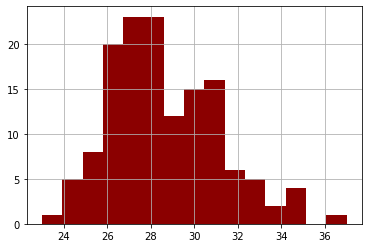

In [266]:
#simple histogram for all ages; season 11-15

df['Age'].hist(bins=15, color='DarkRed')

In [267]:
#Gives min age
df['Age'].min()

23

In [268]:
#Gives the counts for each eye color
df['Eye Color'].value_counts()

Brown    120
Blue      14
Green      7
Name: Eye Color, dtype: int64

In [269]:
#Gives the percentage of each eye color
total_eye_count= df['Eye Color'].value_counts().sum()
partial_eye_count =  df['Eye Color'].value_counts()
for i in partial_eye_count:
    eye_percentage= partial_eye_count/total_eye_count
    eye_percentage= eye_percentage* 100
print(eye_percentage)

Brown    85.106383
Blue      9.929078
Green     4.964539
Name: Eye Color, dtype: float64


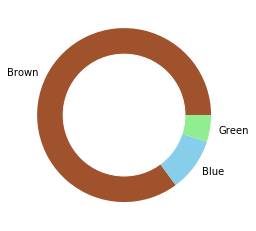

In [270]:
#Donut plot for eye color distributions
#Creates a pie chart for the different eye colors
names='Brown','Blue','Green'
size=[85.106383,9.929078,4.964539]
plt.pie(size, labels=names, colors=['sienna','skyblue','lightgreen'])

#Creates a white circle for the center of the plot
#Makes pie chart become a donut plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [271]:
df['Hair Color'].value_counts()

Brown     133
Blonde      8
Name: Hair Color, dtype: int64

In [272]:
#Gives the percentage of each hair color
total_hair_count= df['Hair Color'].value_counts().sum()
partial_hair_count= df['Hair Color'].value_counts()
for i in partial_hair_count:
    hair_percentage= partial_hair_count/total_hair_count
    hair_percentage= hair_percentage* 100
print(hair_percentage)

Brown     94.326241
Blonde     5.673759
Name: Hair Color, dtype: float64


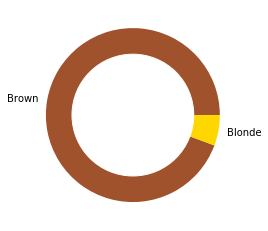

<Figure size 432x288 with 0 Axes>

In [273]:
#Donut Plot for Hair Color Distributions
#Creates pie chart with specific hair colors
names='Brown','Blonde'
size=[94.326241,5.673759]
plt.pie(size, labels=names, colors=['sienna','gold'])

# Creates a white circle for the center of the plot
#Makes pie chart become a donut plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.savefig('DonutPlotHair')

In [274]:
#Finds the mean height in cm, this could have been done with .mean() but the specific steps were shown to demonstrate understanding of the process
totalheight= df['Height (cm)'].sum()
count_of_height = df['Height (cm)'].value_counts().sum()
average = (totalheight)/(count_of_height)
print(average)

183.6651063829787


In [275]:
#Takes the height in cm and returns it in ft and in
def to_inch(x):
    ft_raw = 0.0328084*x
    ft = int(ft_raw)
    rem = ft_raw-ft
    inches = round(rem*12,2)
    print('The average contestant is',ft,'feet and', inches,'inches tall.')
    
to_inch(180.9)

The average contestant is 5 feet and 11.22 inches tall.


In [276]:
#Counts the repitition of  heights
df['Height (cm)'].value_counts()

180.80    40
187.96    21
190.50    15
180.33    12
182.88    12
185.42     6
180.30     5
182.80     4
193.04     3
188.00     3
177.80     2
172.72     2
175.00     2
175.26     2
175.25     2
185.00     2
193.00     2
198.00     1
180.00     1
170.18     1
170.00     1
198.12     1
188.90     1
Name: Height (cm), dtype: int64

In [277]:
from sklearn.cluster import KMeans

In [278]:
df1=df.iloc[:,[2,8]]

In [279]:
sse=[]

In [280]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

In [281]:
sse

[4723.671984397162,
 2031.8664189429176,
 1537.9905212440187,
 1141.2129562369994,
 882.0394491604359,
 697.1440880303028,
 585.995897412587,
 521.5370016961538,
 460.1080474763383,
 428.2270535885161]

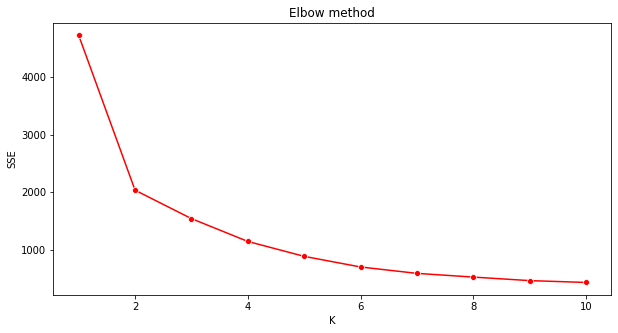

In [286]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),sse,marker='o',color='red')
plt.title("Elbow method")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [287]:
kmeans=KMeans(4)
clusters=kmeans.fit_predict(df1)
df["Clusters"]=clusters
df

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color,Clusters
0,15.0,Jed Wyatt,25,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown,0
1,15.0,Tyler Cameron,26,"Jupiter, Florida",FL,Wake Forest,General Contractor,0.0,187.96,No,Brown,Green,0
2,15.0,Peter Weber,27,"Westlake Village, California",CA,Baylor University,Pilot,0.0,175.25,No,Brown,Brown,3
3,15.0,Luke Parker,24,"Gainesville, Georgia",GA,Faulkner University,Import/Export Manager,0.0,175.00,No,Blonde,Brown,3
4,15.0,Garrett Powell,27,"Homewood, Alabama",AL,Mississippi State University,Golf Pro,0.0,180.80,No,Brown,Green,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,11.0,David Cox,28,"Orlando, Florida",FL,Other,Real Estate Agent,0.0,180.80,No,Brown,Brown,1
137,11.0,"Joshua ""Josh"" Seiter",27,"Chicago, Illinois",IL,Chicago-Kent College,Law Student/Exotic Dancer,0.0,187.96,No,Brown,Brown,0
138,11.0,Shawn Evans,31,"London, Ontario",Other,Other,Amateur Sex Coach,0.0,180.80,No,Brown,Brown,2
139,11.0,Brady Toops,33,"Wauseon, Ohio",OH,Other,Singer/Songwriter,0.0,187.96,No,Brown,Brown,2


In [288]:
#print the cluster groups
gb = df[['Name','Clusters']].groupby('Clusters')
for key, item in gb:
    print(gb.get_group(key), "\n\n")

                           Name  Clusters
0                     Jed Wyatt         0
1                 Tyler Cameron         0
6                  Connor Saeli         0
7               Dustin Kendrick         0
14                   Luke Stone         0
33             Colton Underwood         0
35       Leandro "Leo" Dottavio         0
42             Christon Staples         0
47                  Clay Harbor         0
56                Kamil Nicalek         0
59                  Peter Kraus         0
60                  Eric Bigger         0
61                 Dean Unglert         0
62              Adam Gottschalk         0
63        Matthew "Matt" Munson         0
64   Aleksandr "Alex" Bordyukov         0
65       William "Will" Gaskins         0
67               Anthony Battle         0
71              Jonathan Treece         0
75                 Bryce Powers         0
80              DeMario Jackson         0
86               Milton LaCroix         0
89               Jordan Rodgers   

<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

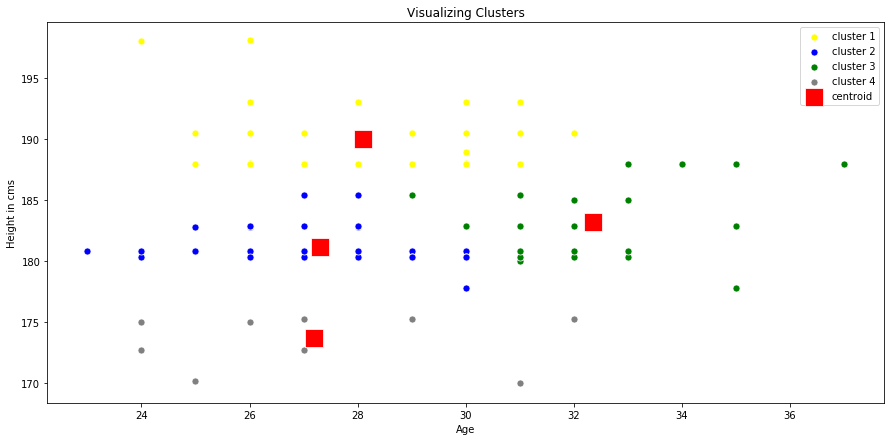

In [289]:
plt.figure(figsize=(15,7))
sns.scatterplot(df1[clusters==0].iloc[:,0],df1[clusters==0].iloc[:,1],color='yellow',label='cluster 1',s=50)
sns.scatterplot(df1[clusters==1].iloc[:,0],df1[clusters==1].iloc[:,1],color='blue',label='cluster 2',s=50)
sns.scatterplot(df1[clusters==2].iloc[:,0],df1[clusters==2].iloc[:,1],color='green',label='cluster 3',s=50)
sns.scatterplot(df1[clusters==3].iloc[:,0],df1[clusters==3].iloc[:,1],color='grey',label='cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',label='centroid', s=300,marker=",")
plt.grid(False)
plt.title("Visualizing Clusters")
plt.xlabel("Age")
plt.ylabel("Height in cms")
plt.legend()
plt

In [290]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [291]:
df.head()

,Season,Name,Age,Hometown,State,College,Occupation,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color,Clusters
0,15.0,Jed Wyatt,25,"Sevierville, Tennessee",TN,Belmont University,Singer/Sonwriter,1.0,190.50,Yes,Brown,Brown,0
1,15.0,Tyler Cameron,26,"Jupiter, Florida",FL,Wake Forest,General Contractor,0.0,187.96,No,Brown,Green,0
2,15.0,Peter Weber,27,"Westlake Village, California",CA,Baylor University,Pilot,0.0,175.25,No,Brown,Brown,3
3,15.0,Luke Parker,24,"Gainesville, Georgia",GA,Faulkner University,Import/Export Manager,0.0,175.00,No,Blonde,Brown,3
4,15.0,Garrett Powell,27,"Homewood, Alabama",AL,Mississippi State University,Golf Pro,0.0,180.80,No,Brown,Green,1


In [292]:
df[['Age', 'Win_Loss']].groupby(['Age'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,Age,Win_Loss
13,37,1.000000
2,25,0.125000
6,29,0.083333
4,27,0.043478
5,28,0.043478
0,23,0.000000
1,24,0.000000
3,26,0.000000
7,30,0.000000
8,31,0.000000


In [293]:
df[["State", "Win_Loss"]].groupby(['State'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,State,Win_Loss
27,TN,0.333333
5,CT,0.250000
21,NY,0.166667
6,FL,0.062500
3,CA,0.031250
25,PA,0.000000
20,NJ,0.000000
22,OH,0.000000
23,OK,0.000000
24,Other,0.000000


In [294]:
df[['College', 'Win_Loss']].groupby(['College'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,College,Win_Loss
2,Belmont University,1.0
4,Butte College,1.0
73,University of Rochester,1.0
31,Keene State College,1.0
60,University of Florida,0.5
...,...,...
29,James Madison University,0.0
28,Indiana University,0.0
27,Illinois State University,0.0
26,High Point University,0.0


In [295]:
df[['Hair Color', 'Win_Loss']].groupby(['Hair Color'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,Hair Color,Win_Loss
1,Brown,0.037594
0,Blonde,0.000000


In [296]:
df[['Eye Color', 'Win_Loss']].groupby(['Eye Color'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,Eye Color,Win_Loss
1,Brown,0.041667
0,Blue,0.000000
2,Green,0.000000


In [297]:
df[['Occupation', 'Win_Loss']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,Occupation,Win_Loss
18,Chiropractor,1.0
45,Former Pro Quarterback,1.0
106,Singer/Sonwriter,1.0
101,Senior Corporate Banker,1.0
77,Personal Trainer,0.5
...,...,...
37,Finance Manager,0.0
36,Fashion Designer,0.0
35,Executive Recruiter,0.0
34,Executive Assistant,0.0


In [298]:
df[['Height (cm)', 'Win_Loss']].groupby(['Height (cm)'], as_index=False).mean().sort_values(by='Win_Loss', ascending=False)

,Height (cm),Win_Loss
5,175.26,0.500000
15,187.96,0.142857
18,190.50,0.066667
0,170.00,0.000000
12,182.88,0.000000
21,198.00,0.000000
20,193.04,0.000000
19,193.00,0.000000
17,188.90,0.000000
16,188.00,0.000000


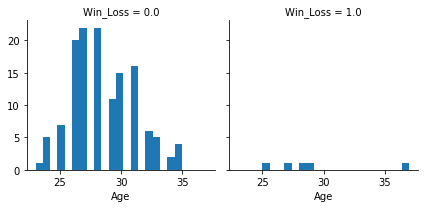

In [299]:
g = sns.FacetGrid(df, col='Win_Loss')
g.map(plt.hist, 'Age', bins=20)

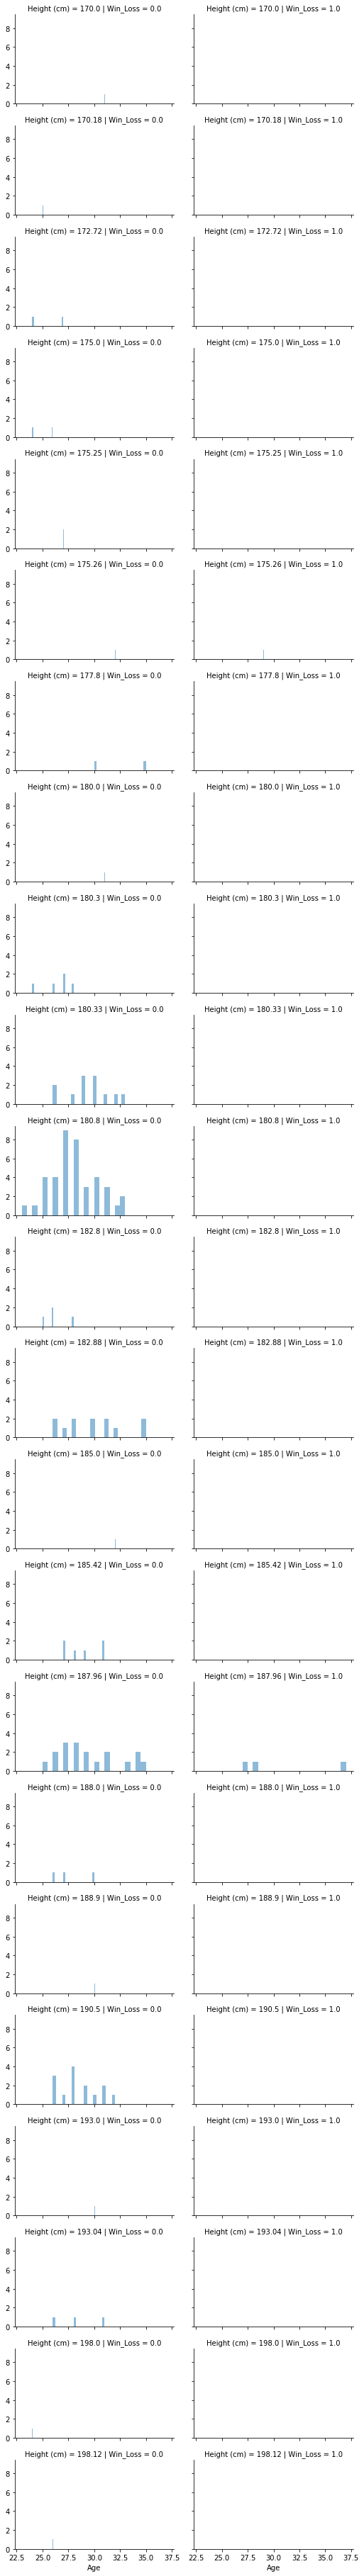

In [300]:

grid = sns.FacetGrid(df, col='Win_Loss', row='Height (cm)', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

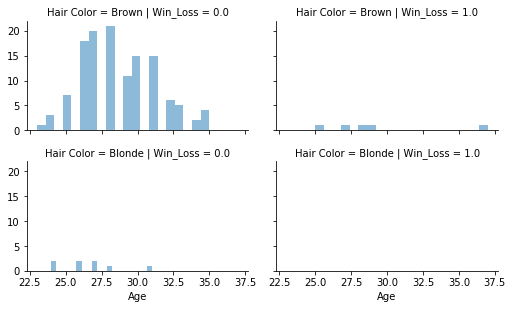

In [301]:

grid = sns.FacetGrid(df, col='Win_Loss', row='Hair Color', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

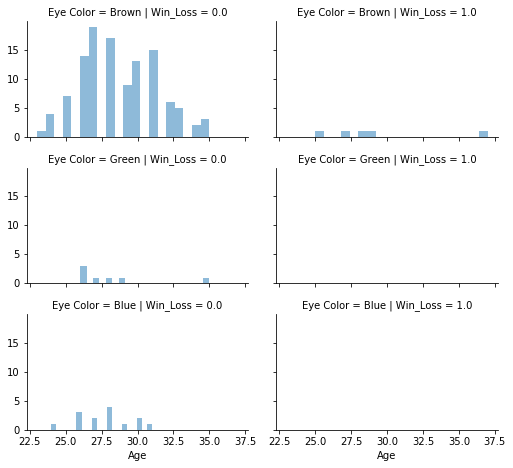

In [302]:

grid = sns.FacetGrid(df, col='Win_Loss', row='Eye Color', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



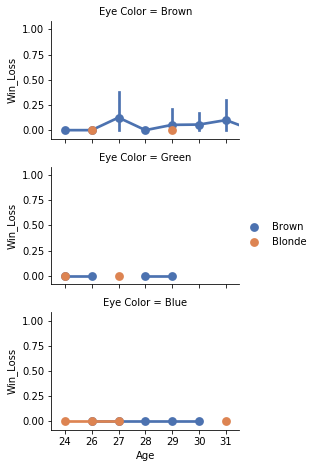

In [303]:

grid = sns.FacetGrid(df, row='Eye Color', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Age', 'Win_Loss', 'Hair Color', palette='deep')
grid.add_legend()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



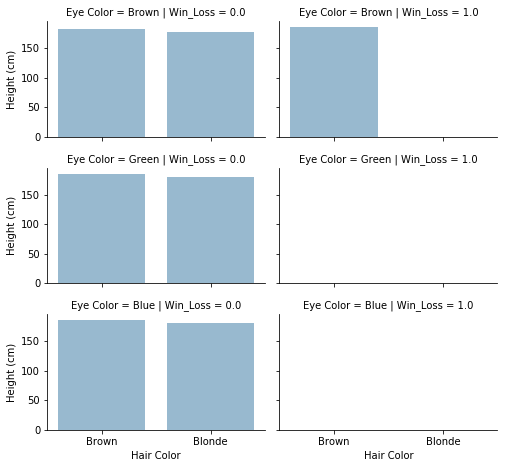

In [304]:

grid = sns.FacetGrid(df, row='Eye Color', col='Win_Loss', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Hair Color', 'Height (cm)', alpha=.5, ci=None)
grid.add_legend()

In [305]:
df = df.drop(['Occupation', 'Clusters'], axis=1)

In [306]:
df['Hair Color'] = df['Hair Color'].map( {'Brown': 1, 'Blonde': 0} ).astype(int)

df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,25,"Sevierville, Tennessee",TN,Belmont University,1.0,190.50,Yes,1,Brown
1,15.0,Tyler Cameron,26,"Jupiter, Florida",FL,Wake Forest,0.0,187.96,No,1,Green
2,15.0,Peter Weber,27,"Westlake Village, California",CA,Baylor University,0.0,175.25,No,1,Brown
3,15.0,Luke Parker,24,"Gainesville, Georgia",GA,Faulkner University,0.0,175.00,No,0,Brown
4,15.0,Garrett Powell,27,"Homewood, Alabama",AL,Mississippi State University,0.0,180.80,No,1,Green


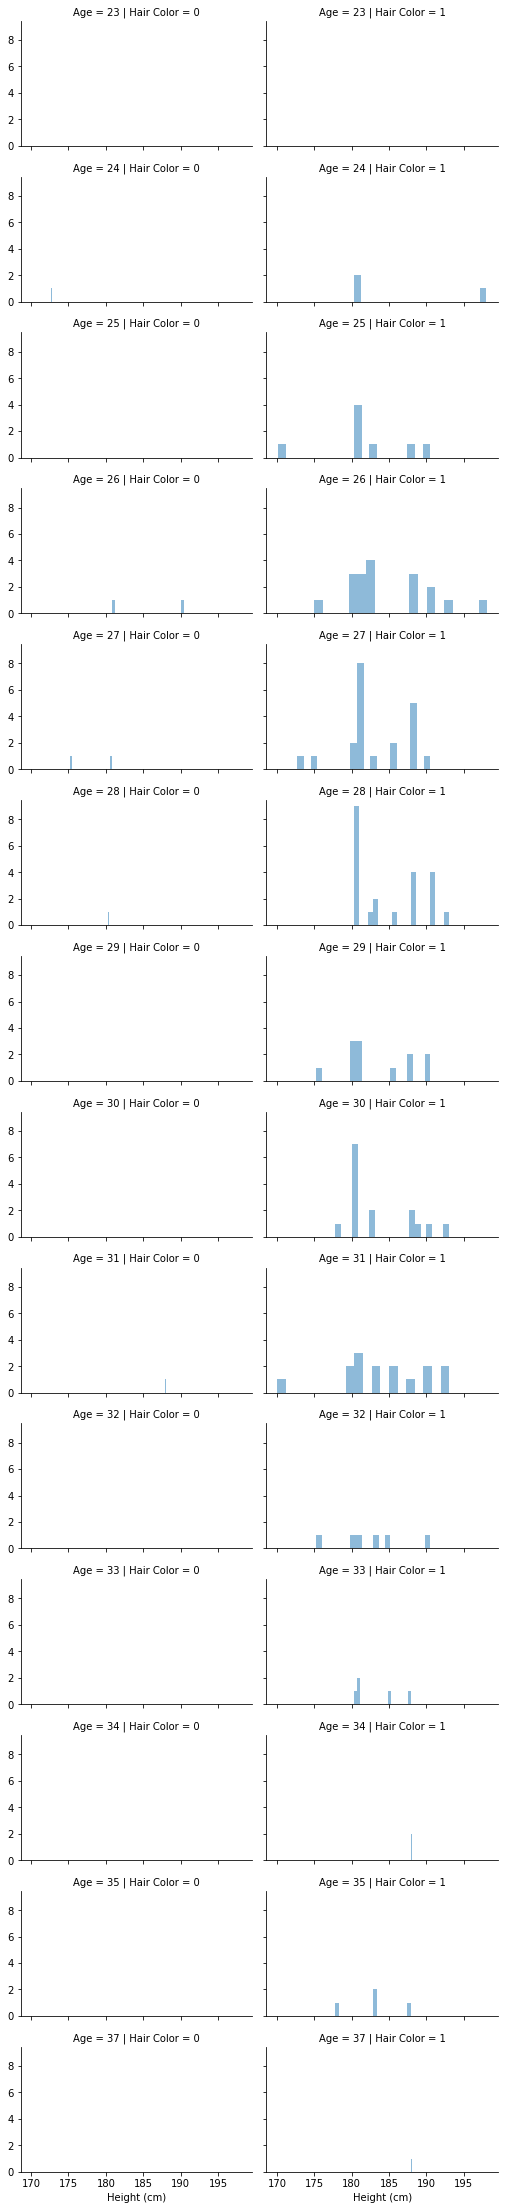

In [307]:
grid = sns.FacetGrid(df, row='Age', col='Hair Color', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Height (cm)', alpha=.5, bins=20)
grid.add_legend()

In [308]:
guess_height = np.zeros((2,3))
guess_height

array([[0., 0., 0.],
       [0., 0., 0.]])

In [309]:
df.loc[ df['Age'] <= 20, 'Age'] = 0
df.loc[(df['Age'] > 20) & (df['Age'] <= 25), 'Age'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 30), 'Age'] = 2
df.loc[(df['Age'] > 30) & (df['Age'] <= 35), 'Age'] = 3
df.loc[ df['Age'] > 35, 'Age']
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,190.50,Yes,1,Brown
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,187.96,No,1,Green
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,175.25,No,1,Brown
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,175.00,No,0,Brown
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,180.80,No,1,Green


In [310]:
df.loc[ df['Eye Color'] == 'Brown', 'Eye Color'] = 0
df.loc[ df['Eye Color'] == 'Blue', 'Eye Color'] = 1
df.loc[ df['Eye Color'] == 'Green', 'Eye Color'] = 2
df.head()


,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,190.50,Yes,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,187.96,No,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,175.25,No,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,175.00,No,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,180.80,No,1,2


In [311]:
df.loc[ df['Girlfriend While on the Show?'] == 'No', 'Girlfriend While on the Show?'] = 0
df.loc[ df['Girlfriend While on the Show?'] == 'Yes', 'Girlfriend While on the Show?'] = 1

In [312]:
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,190.50,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,187.96,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,175.25,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,175.00,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,180.80,0,1,2


In [314]:
df.loc[ df['Height (cm)'] < 175.00, 'Height (cm)'] = 0
df.loc[ (df['Height (cm)'] >= 175.00) & (df['Height (cm)'] <180.00), 'Height (cm)'] = 1
df.loc[ (df['Height (cm)'] >= 180.00) & (df['Height (cm)'] <185.00), 'Height (cm)'] = 2
df.loc[ (df['Height (cm)'] >= 185.00) & (df['Height (cm)'] <190.00), 'Height (cm)'] = 3
df.loc[ df['Height (cm)'] >= 190.00 , 'Height (cm)'] = 3
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,3.0,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,3.0,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,1.0,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,1.0,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,2.0,0,1,2


In [317]:
df.loc[ df['Height (cm)'] == 0.0, 'Height (cm)'] = '0'
df.loc[ df['Height (cm)'] == 1.0, 'Height (cm)'] = '1'
df.loc[ df['Height (cm)'] == 2.0, 'Height (cm)'] = '2'
df.loc[ df['Height (cm)'] == 3.0, 'Height (cm)'] = '3'
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,3,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,3,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,1,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,1,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,2,0,1,2


In [318]:
df.loc[ df['Height (cm)'] == '0', 'Height (cm)'] = 0
df.loc[ df['Height (cm)'] == '1', 'Height (cm)'] = 1
df.loc[ df['Height (cm)'] == '2', 'Height (cm)'] = 2
df.loc[ df['Height (cm)'] == '3', 'Height (cm)'] = 3
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1.0,3,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0.0,3,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0.0,1,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0.0,1,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0.0,2,0,1,2


In [319]:
df.loc[ df['Win_Loss'] == 0.0, 'Win_Loss'] = '0'
df.loc[ df['Win_Loss'] == 0.0, 'Win_Loss'] = '0'
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1,3,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0,3,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0,1,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0,1,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0,2,0,1,2


In [320]:
df.loc[ df['Win_Loss'] == 1.0, 'Win_Loss'] = '1'


In [321]:
df.loc[ df['Win_Loss'] == '0', 'Win_Loss'] = 0
df.loc[ df['Win_Loss'] == '1', 'Win_Loss'] = 1
df.head()

,Season,Name,Age,Hometown,State,College,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,Jed Wyatt,1,"Sevierville, Tennessee",TN,Belmont University,1,3,1,1,0
1,15.0,Tyler Cameron,2,"Jupiter, Florida",FL,Wake Forest,0,3,0,1,2
2,15.0,Peter Weber,2,"Westlake Village, California",CA,Baylor University,0,1,0,1,0
3,15.0,Luke Parker,1,"Gainesville, Georgia",GA,Faulkner University,0,1,0,0,0
4,15.0,Garrett Powell,2,"Homewood, Alabama",AL,Mississippi State University,0,2,0,1,2


In [322]:
df = df.drop(['Name', 'Hometown','State','College'], axis=1)
df.head()

,Season,Age,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,15.0,1,1,3,1,1,0
1,15.0,2,0,3,0,1,2
2,15.0,2,0,1,0,1,0
3,15.0,1,0,1,0,0,0
4,15.0,2,0,2,0,1,2


In [323]:
df.loc[ df['Season'] == 11.0, 'Season'] = '0'
df.loc[ df['Season'] == 12.0, 'Season'] = '1'
df.loc[ df['Season'] == 13.0, 'Season'] = '2'
df.loc[ df['Season'] == 14.0, 'Season'] = '3'
df.loc[ df['Season'] == 15.0, 'Season'] = '4'
df.head()

,Season,Age,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,4,1,1,3,1,1,0
1,4,2,0,3,0,1,2
2,4,2,0,1,0,1,0
3,4,1,0,1,0,0,0
4,4,2,0,2,0,1,2


In [324]:
df.loc[ df['Season'] == '0', 'Season'] = 0
df.loc[ df['Season'] == '1', 'Season'] = 1
df.loc[ df['Season'] == '2', 'Season'] = 2
df.loc[ df['Season'] == '3', 'Season'] = 3
df.loc[ df['Season'] == '4', 'Season'] = 4
df.head()

,Season,Age,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color
0,4,1,1,3,1,1,0
1,4,2,0,3,0,1,2
2,4,2,0,1,0,1,0
3,4,1,0,1,0,0,0
4,4,2,0,2,0,1,2


((141, 6), (141,), (141, 6))

In [332]:
x=[]
for i in range(0,141):
    x.append(i)
df['no.']=x
df.head()

,Season,Age,Win_Loss,Height (cm),Girlfriend While on the Show?,Hair Color,Eye Color,no.
0,4,1,1,3,1,1,0,0
1,4,2,0,3,0,1,2,1
2,4,2,0,1,0,1,0,2
3,4,1,0,1,0,0,0,3
4,4,2,0,2,0,1,2,4


In [337]:
X_train = df.drop("Win_Loss", axis=1)
Y_train = df["Win_Loss"]
X_test  = df.drop("no.", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((141, 7), (141,), (141, 7))

In [340]:
from sklearn.linear_model import LogisticRegression

In [348]:
convert_dict = {'Season': int, 'Age': int,'Height (cm)': int,'Girlfriend While on the Show?': int, 'Hair Color':int,'Eye Color':int,'no.':int}
df = df.astype(convert_dict)

In [349]:
convert_dic={'Win_Loss':int}
df=df.astype(convert_dic)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Season                         141 non-null    int32
 1   Age                            141 non-null    int32
 2   Win_Loss                       141 non-null    int32
 3   Height (cm)                    141 non-null    int32
 4   Girlfriend While on the Show?  141 non-null    int32
 5   Hair Color                     141 non-null    int32
 6   Eye Color                      141 non-null    int32
 7   no.                            141 non-null    int32
dtypes: int32(8)
memory usage: 5.5 KB


In [351]:
X_train = df.drop("Win_Loss", axis=1)
Y_train = df["Win_Loss"]
X_test  = df.drop("no.", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((141, 7), (141,), (141, 7))

In [354]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



97.16

In [355]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Girlfriend While on the Show?,0.756026
2,Height (cm),0.325122
1,Win_Loss,0.161088
4,Hair Color,0.143609
6,no.,-0.053798
5,Eye Color,-0.462699
0,Age,-1.341533


In [368]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 3)
acc_svc

96.454

In [367]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)
acc_knn

96.454

In [366]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)
acc_gaussian

19.858

In [364]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 3)
acc_perceptron

96.454

In [363]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 3)
acc_linear_svc

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



95.035

In [369]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

97.16

In [370]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [371]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [372]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.000
8,Decision Tree,100.000
2,Logistic Regression,97.160
6,Stochastic Gradient Decent,97.160
0,Support Vector Machines,96.454
1,KNN,96.454
5,Perceptron,96.454
7,Linear SVC,95.035
4,Naive Bayes,19.858


In [375]:
submission = pd.DataFrame({
        "no.": df["no."],
        "Win_Loss": Y_pred
    })
submission.to_csv("submission2.csv", index=False)